In [13]:
import pandas as pd
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
from statistics import mean
import math
from math import log
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


In [14]:
pkl_file = open('blinexe.pkl', 'rb')
mydata = pickle.load(pkl_file)


In [15]:
#for key, value in mydata.items():
#    print(key, "=", value )

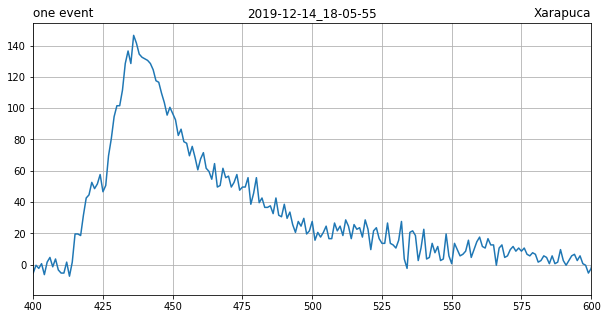

In [16]:
data=(mydata['ch0'][0])
plt.plot((data))
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
#plt.yscale('log')
plt.grid(True)
t = np.arange(len(data))
plt.xlim(400, 600)
#plt.ylim(-20, 20)
plt.show()

/home/furkan/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/home/furkan/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


[ 1.57575758 -0.42424242 -2.42424242 ... -0.42424242  1.57575758
  0.57575758]
[ 0.38383838 -0.42424242  0.24242424 ...  2.24242424  0.57575758
  0.71717172]


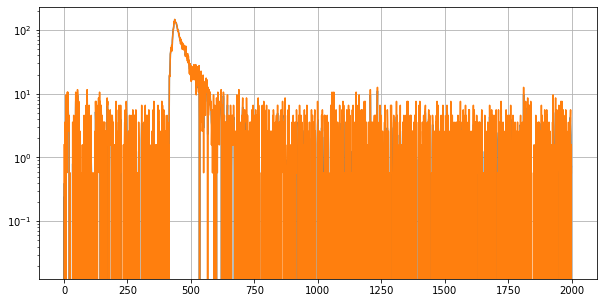

In [17]:
from scipy import signal 
sig = (mydata['ch0'][0])
autocorr = signal.wiener(sig)
print(sig)
print(autocorr)
#plt.yscale('log')
#plt.ylim(0, 3000)
#plt.xlim(400, 600)

plt.plot(autocorr)
plt.plot(sig)
plt.yscale('log')

plt.grid(True)
plt.show()

/home/furkan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


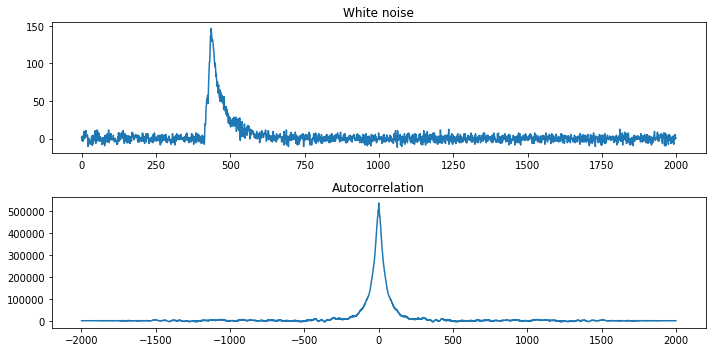

In [18]:
from scipy import signal 
sig = (mydata['ch0'][0])
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')



import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(np.arange(-len(sig)+1,len(sig)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()
fig.show()



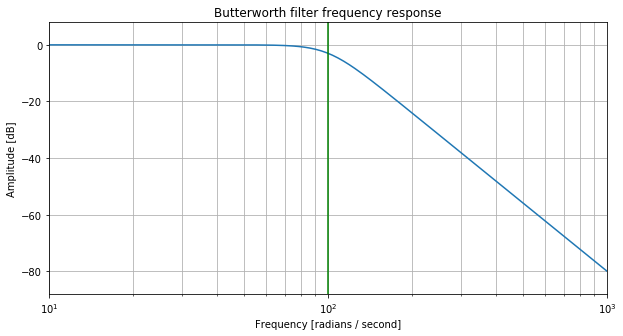

In [19]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

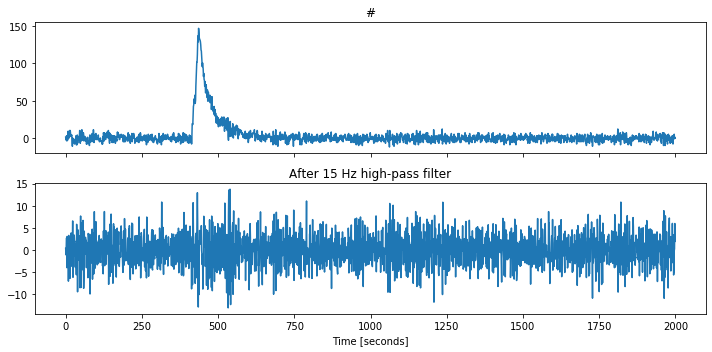

In [20]:
sig1 = (mydata['ch0'][0])
t1 = np.arange(len(sig1))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t1, sig1)
ax1.set_title('#')
#ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=200, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t1, filtered)
ax2.set_title('After 15 Hz high-pass filter')
#ax2.axis([400, 1500, -12500, 12500])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

[ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  6.05139410e-101
 -1.75947434e-100 -2.70700846e-100]


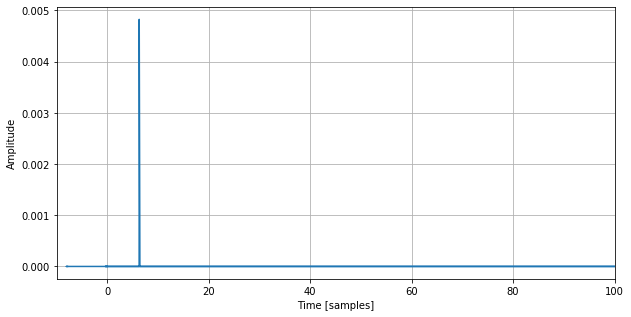

In [24]:
sig = ((mydata['ch0']).mean(axis=0))

imp = signal.unit_impulse(2000, 'mid')
b, a = signal.butter(4, 0.2)
response = signal.lfilter(b, a, imp)
print(response)

#plt.plot(sig, imp)
plt.plot(sig, response*imp)
#plt.margins(0.1, 0.1)
plt.xlim(-10, 100)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


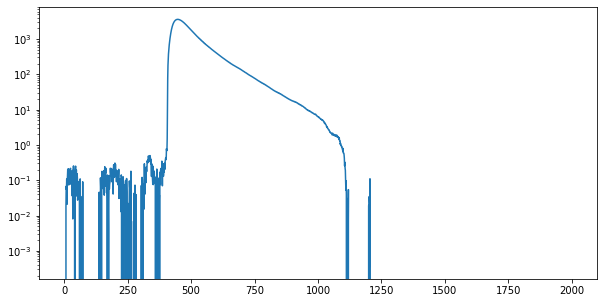

In [29]:
from scipy import signal
#impulse_response = signal.unit_impulse(2)
impulse_response=[400,4]
original = (mydata['ch0']).mean(axis=0)
recorded = signal.convolve(impulse_response, original)
decon= recovered, remainder = signal.deconvolve(recorded, impulse_response)
plt.yscale('log')
#print(recovered)
#print(recorded)
#plt.xlim(400, 600)
#plt.plot(recovered)
plt.plot(original)
plt.show()

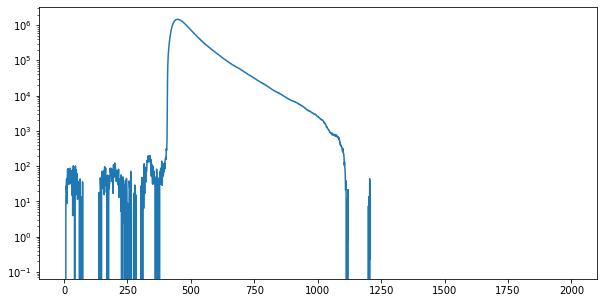

In [30]:
plt.yscale('log')
#plt.xlim(400, 600)
plt.plot(recorded)

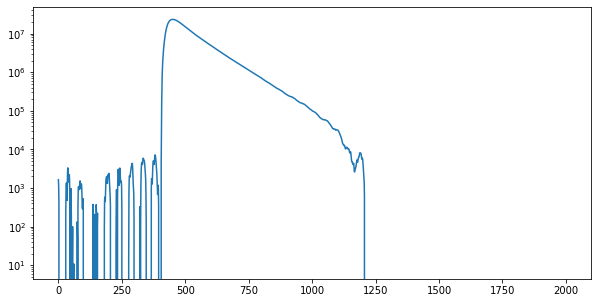

In [18]:

import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

signal = (mydata['ch8']).sum(axis=0)

from scipy.ndimage import gaussian_filter
gauss=gaussian_filter(signal, sigma=1)
plt.yscale('log')
plt.plot(gauss)

#https://matplotlib.org/2.0.2/examples/pylab_examples/axes_demo.html



In [19]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt


from scipy.ndimage import gaussian_filter


signal = (mydata['ch1']).sum(axis=0)
from scipy.ndimage import gaussian_filter
gauss=gaussian_filter(signal, sigma=1)

filtered = np.convolve(signal, gauss, mode='same') 
deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
n = len(signal)-len(gauss)+1
s = int((len(signal)-n)/2)
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
print(deconv)     
    
   

[0. 0. 0. ... 0. 0. 0.]


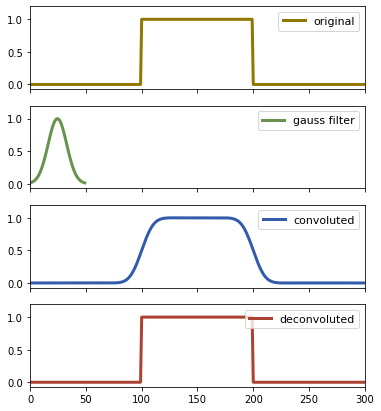

In [20]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)
# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )


# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
#filtered = scipy.signal.convolve(signal, gauss, mode='same') 
filtered = np.convolve(signal, gauss, mode='same') 

deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = int((len(signal)-n)/2)
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:(len(signal)-s-1)] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.show()    

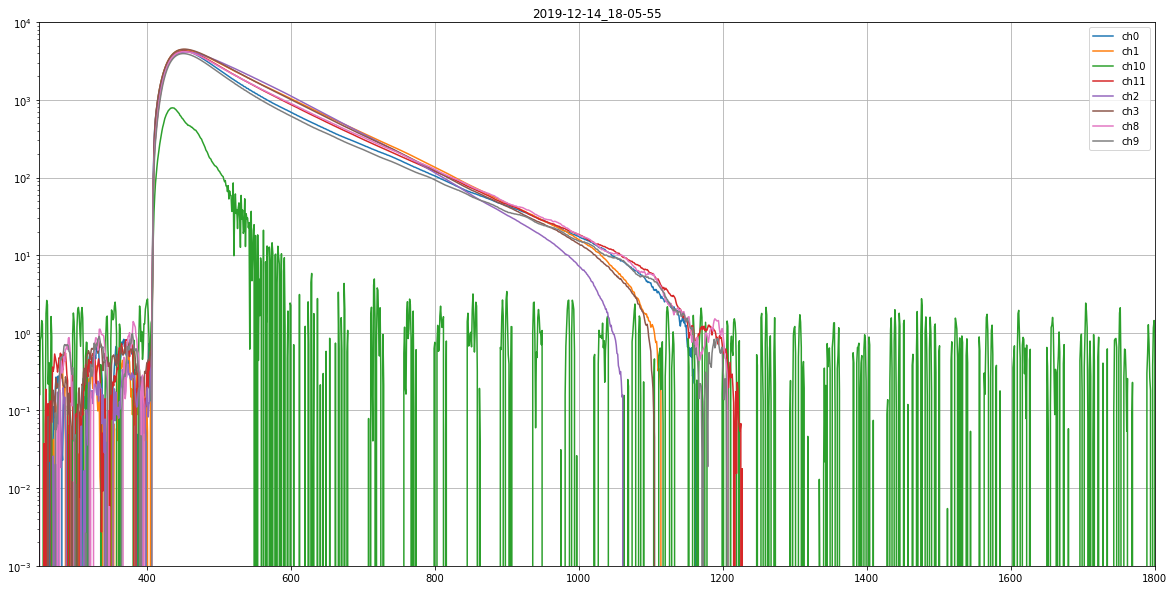

In [32]:
rcParams['figure.figsize'] = 20, 10

dict_s ={}
for key, value in mydata.items():
#    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    data1=mydata[key]
    
    #print(key)
    dict_s.update({key:data1.mean(axis=0)})

for key, value in dict_s.items():
    plt.plot(range(1, len(value) + 1), value, label=key)
    # NOTE: changed `range(1, 4)` to mach actual values count
plt.title('2019-12-14_18-05-55')
plt.yscale('log')
plt.grid(True)
plt.ylim(0.001, 10000)
plt.xlim(250, 1800)
plt.legend()  # To draw legend
plt.show()


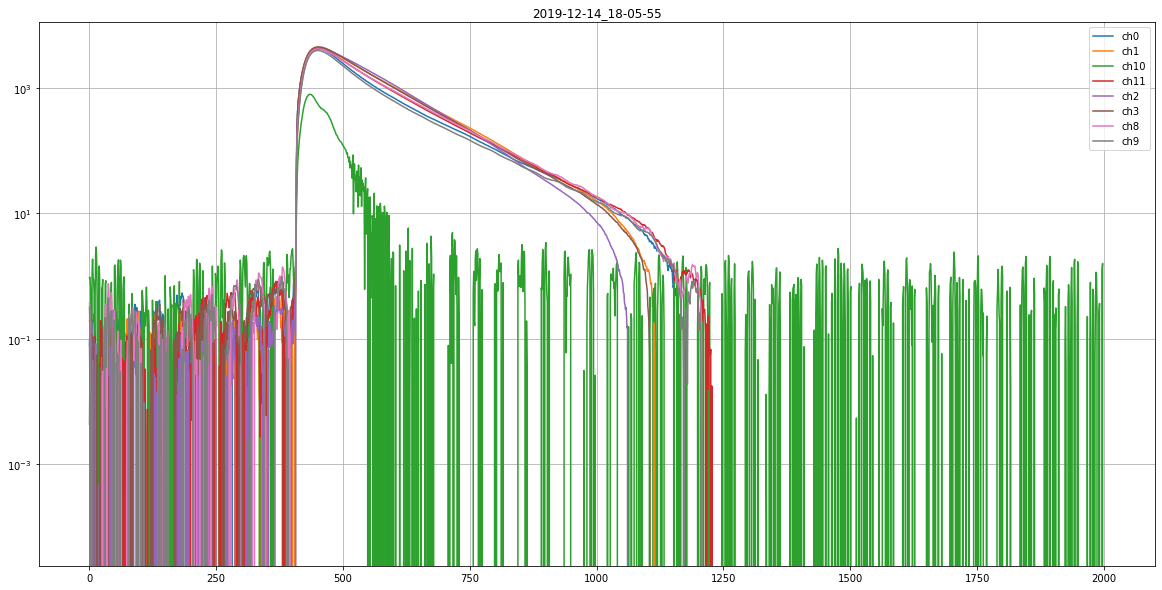

In [30]:
rcParams['figure.figsize'] = 20, 10

dict_s ={}
for key, value in mydata.items():
#    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    data1=mydata[key]
    
    #print(key)
    dict_s.update({key:data1.mean(axis=0)})

for key, value in dict_s.items():
    plt.plot(range(1, len(value) + 1), value, label=key)
    # NOTE: changed `range(1, 4)` to mach actual values count
plt.title('2019-12-14_18-05-55')
plt.yscale('log')
plt.grid(True)
#plt.ylim(0, 200)
#plt.xlim(368, 376)
plt.legend()  # To draw legend
plt.show()


[  0.24155253   0.18615099   0.07838852 ... -11.15862186 -11.28315235
 -11.35465119]


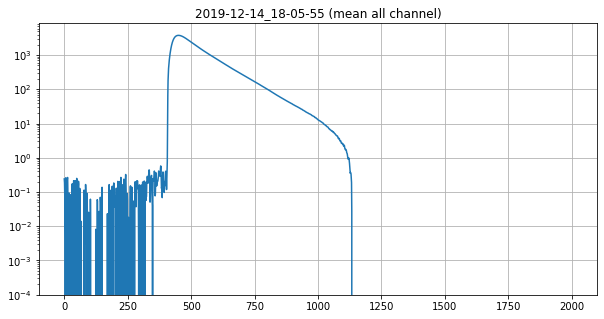

In [23]:
rcParams['figure.figsize'] = 10, 5

dict_s ={}
for key, value in mydata.items():
#    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    data1=mydata[key]
    
    #print(key)
    dict_s.update({key:data1.mean(axis=0)})

data1=np.array(list(dict_s.values())).mean(axis=0)
np.savetxt("meanchannnel.csv", data1, delimiter=",")    
print(data1)
plt.plot(data1)
t = np.arange(len(data1))

plt.title('2019-12-14_18-05-55 (mean all channel)')
plt.yscale('log')
plt.grid(True)
#plt.ylim(0, 200)
#plt.xlim(368, 376)
#plt.legend()  # To draw legend
#plt.show()


In [24]:
    def model(t, coeffs):
        #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
        return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )

In [25]:
def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    #return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )
    return (coeffs[0]*np.exp(-t*coeffs[1]))

#x0 = np.array([365, 5,1 , 600, 10], dtype=float)
x0 = np.array([3675, 0.00433,], dtype=float)
print(x0)
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

[3.675e+03 4.330e-03]


In [26]:
#from scipy.optimize import leastsq
#x, flag = leastsq(residuals, x0, args=(data1, t))
#print (x)

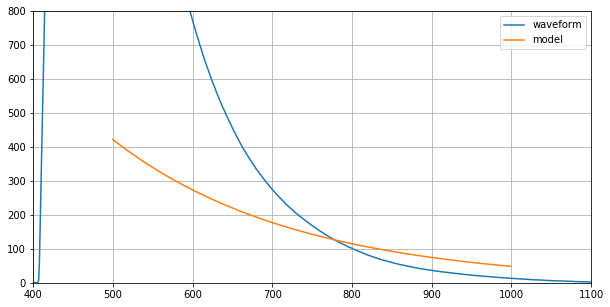

2000

In [27]:
plt.plot(t,data1,t[500:1000:1], model(t[500:1000:1], x0)) 
#print(model(t[500:1000:1], x0))
plt.legend(['waveform', 'model']) 
plt.ylim(0,800)
plt.xlim(400,1100)

#plt.yscale('log')

plt.grid(True)
plt.show()
t.size

In [28]:
def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    #return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )
    return (coeffs[0]*np.exp(-t*coeffs[1]))

#x0 = np.array([365, 5,1 , 600, 10], dtype=float)
x0 = np.array([752, 0.00745,], dtype=float)
print(x0)
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

[7.52e+02 7.45e-03]


In [ ]:
plt.plot(t,data1,t[386:408:1], model(t[386:408:1], x0)) 
#print(model(t[500:1000:1], x0))
plt.legend(['waveform', 'model']) 
plt.ylim(0,800)
plt.xlim(350,450)

#plt.yscale('log')
plt.grid(True)
plt.show()
t.size